In [1]:
# The following is based on data from: http://dx.doi.org/10.1016/j.calphad.2010.01.004
# However, we use a modified version of the .tdb file to streamline the process.
TDB = """
 ELEMENT C    GRAPHITE                   12.011     1054.0      5.7423 !
 ELEMENT FE   BCC_A2                     55.847     4489.0     27.2797 !
 TYPE_DEFINITION % SEQ * !
 TYPE_DEFINITION A GES AMEND_PHASE_DESCRIPTION @ MAGNETIC -3 0.28 !
 PHASE CEMENTITE_D011 %A 2 3 1 !
 CONSTITUENT CEMENTITE_D011 : FE : C : !
 PARAMETER  G(CEMENTITE_D011,FE:C;0) 0.01 +GFECEM; 6000 N !
 PARAMETER  TC(CEMENTITE_D011,FE:C;0) 0.01 485.00; 6000 N !
 PARAMETER  BMAGN(CEMENTITE_D011,FE:C;0) 0.01 1.008; 6000 N !
 FUNCTION GFECEM      0.01  +11369.937746-5.641259263*T-8.333E-6*T**4;
        43.00  Y  +11622.647246-59.537709263*T+15.74232*T*LN(T)
       -0.27565*T**2;
       163.00  Y  -10195.860754+690.949887637*T-118.47637*T*LN(T)
                  -0.0007*T**2+590527*T**(-1);
      6000.00  N !
"""

In [2]:
# Now, for some initial setup
# Only needed in a Jupyter Notebook
%matplotlib inline
# Optional plot styling
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate

db = Database(TDB)

In [4]:
#Here, we use the calculate function of pycalphad to get the heat capacity
result = calculate(db, ['FE', 'C'], 'CEMENTITE_D011', T=(1, 2000, 0.1), P=101325, N=1, output='heat_capacity')

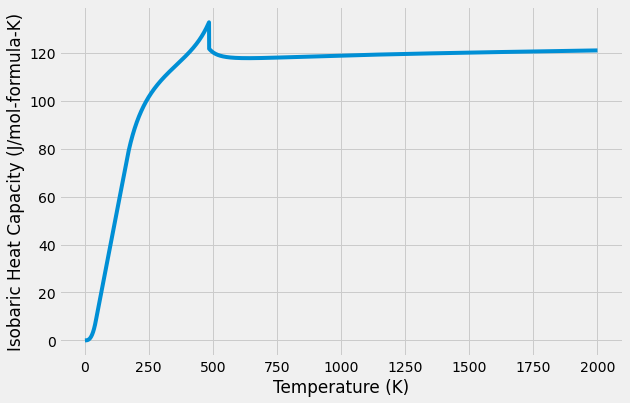

In [5]:
# Note: 4 moles of atoms per formula unit (Fe3C1). That's why we multiply times 4
fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Isobaric Heat Capacity (J/mol-formula-K)')
fig.gca().plot(result['T'], np.squeeze(4.0 * result['heat_capacity']))
plt.show()